**Import Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report


**Load and Explore the Dataset **

In [2]:
# Load dataset
df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")

# Display basic information
print(df.head())
print(df.info())
print(df.describe())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

**Data Preprocessing**

In [3]:
# Check for missing values
print(df.isnull().sum())

# Feature selection
X = df.drop(columns=["Class"])
y = df["Class"]

# Scale 'Amount' and 'Time' features
scaler = StandardScaler()
X[["Amount", "Time"]] = scaler.fit_transform(X[["Amount", "Time"]])


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


**Handle Class Imbalance using SMOTE**

In [4]:
# Splitting dataset before applying SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to balance fraud cases
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"Original dataset shape: {y_train.value_counts()}")
print(f"After SMOTE: {y_train_smote.value_counts()}")


Original dataset shape: Class
0    227451
1       394
Name: count, dtype: int64
After SMOTE: Class
0    227451
1    113725
Name: count, dtype: int64


**Data Visualization**

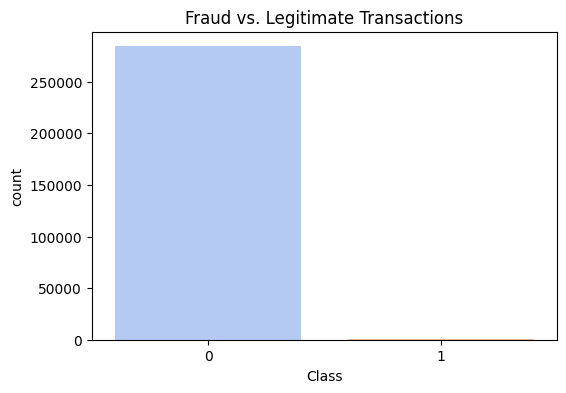

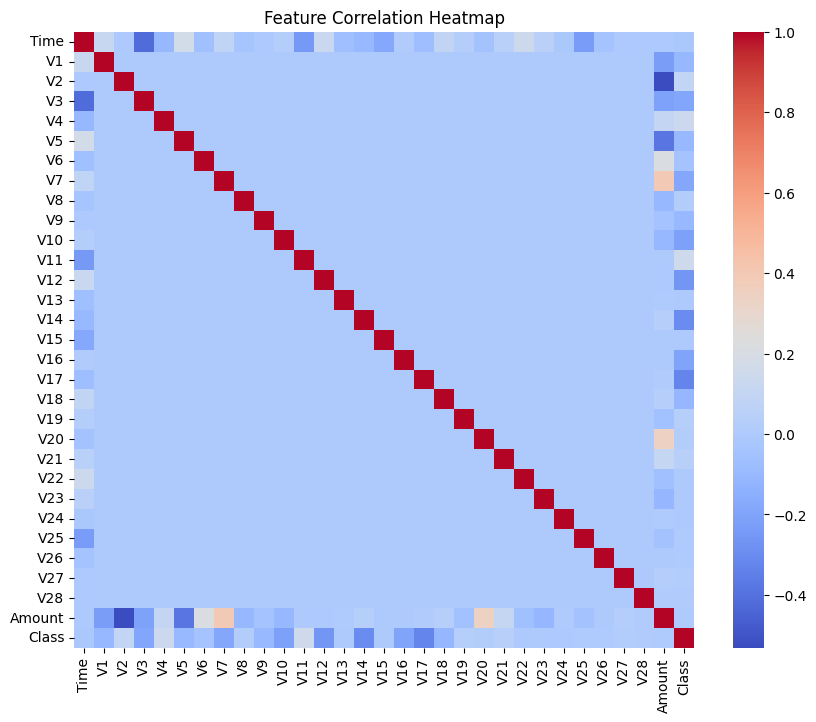

In [5]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette="coolwarm")
plt.title("Fraud vs. Legitimate Transactions")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


**Model Training (Random Forest Classifier)**

In [6]:
# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred = rf_model.predict(X_test)


**Model Evaluation**

In [7]:
print("Model Performance Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Model Performance Metrics:
Accuracy: 0.9995
Precision: 0.8617
Recall: 0.8265
F1 Score: 0.8438
AUC-ROC: 0.9132

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.83      0.84        98

    accuracy                           1.00     56962
   macro avg       0.93      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [26]:
def predict_fraud(transaction_data, model, scaler):
    """
    Predicts whether a transaction is fraudulent or legitimate.
    
    Parameters:
    - transaction_data: List or NumPy array of transaction features (1 sample, 30 features).
    - model: Trained fraud detection model.
    - scaler: Fitted scaler for normalizing 'Amount' and 'Time'.
    
    Returns:
    - "Fraudulent Transaction Detected!" or "Legitimate Transaction."
    """
    import numpy as np

    # Convert input to NumPy array and reshape for prediction
    transaction = np.array(transaction_data).reshape(1, -1)
    
    # Scale 'Time' and 'Amount' features (first and last columns)
    transaction[:, [0, 29]] = scaler.transform(transaction[:, [0, 29]])

    # Make prediction
    prediction = model.predict(transaction)

    # Output result
    return "🚨 Fraudulent Transaction Detected!" if prediction[0] == 1 else "✅ Legitimate Transaction."


# Example Usage:
# Sample normal transaction
normal_input = [50, 5000, -0.2, 0.5, 0.1, -1.2, 0.4, -0.5, 0.3, 0.2, 
                -0.1, 0.3, -0.4, 1.1, -1.2, 0.8, -0.3, 0.5, 0.6, -0.2, 
                -0.4, 0.2, 1.2, -0.3, 0.7, -0.1, 0.3, -0.6, 0.9, 1.0]

# Sample fraudulent transaction
fraud_input = [5000, 150000, -3.1, 4.2, -2.4, 3.5, -4.0, 2.3, 4.0, -3.6, 
               1.8, -2.5, 4.5, -3.2, 3.8, -4.1, 2.2, -3.0, 3.6, -2.4, 
               4.1, -3.8, 2.7, -4.0, 3.1, -3.6, 4.0, -3.9, 3.5, -4.2]

# Predicting results
print(predict_fraud(normal_input, rf_model, scaler))
print(predict_fraud(fraud_input, rf_model, scaler))


✅ Legitimate Transaction.
✅ Legitimate Transaction.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [37]:
fraudulent_transactions = df[df['Class'] == 1]
fraudulent_transactions

<bound method Series.items of Time      406.000000
V1         -2.312227
V2          1.951992
V3         -1.609851
V4          3.997906
V5         -0.522188
V6         -1.426545
V7         -2.537387
V8          1.391657
V9         -2.770089
V10        -2.772272
V11         3.202033
V12        -2.899907
V13        -0.595222
V14        -4.289254
V15         0.389724
V16        -1.140747
V17        -2.830056
V18        -0.016822
V19         0.416956
V20         0.126911
V21         0.517232
V22        -0.035049
V23        -0.465211
V24         0.320198
V25         0.044519
V26         0.177840
V27         0.261145
V28        -0.143276
Amount      0.000000
Class       1.000000
Name: 541, dtype: float64>